In [2]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [3]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=7)
principal_components = pca.fit_transform(df_scaled.drop('Preferred Foot', axis=1))
print(pca.explained_variance_)
df_pca = pd.DataFrame(principal_components, columns=['pca1', 'pca2', 'pca3', 'pca4', 
                                                     'pca5', 'pca6', 'pca7'])
df_pca.head()

[0.76676203 0.26422549 0.1065898  0.07803898 0.07518619 0.03933752
 0.03222592]


,pca1,pca2,pca3,pca4,pca5,pca6,pca7
0,-1.738907,-1.029777,1.301215,-0.314418,0.241063,-0.269214,-0.273672
1,-1.694785,-0.863609,1.152237,0.453901,-0.185612,-0.674559,-0.190727
2,-1.641481,-0.954018,1.127331,-0.338866,0.014952,-0.359946,-0.382645
3,1.808043,-0.220500,1.487694,-0.243153,-0.395412,-0.698051,-0.295744
4,-1.663613,-0.124958,1.153616,-0.028977,-0.547722,-0.171120,-0.337195


In [5]:
df = pd.read_csv('../data.csv', index_col=0)
df_scaled = pd.read_csv('../preprocessed_data.csv', index_col=0)

In [144]:
for eps in [0.2, 0.22, 0.24, 0.28, 0.32]:
    for min_s in [2, 3, 4, 5, 6]:
        est_dbscan = DBSCAN(eps=eps, min_samples=min_s)
        est_dbscan.fit(df_pca)
        print("EPS: {}, MIN_SAMPLE {}, {}".format(eps, min_s,
                                    silhouette_score(df_scaled, est_dbscan.labels_)))

KeyboardInterrupt: 

In [7]:
est_dbscan = DBSCAN(eps=0.32, min_samples=2)
est_dbscan.fit(df_pca)
        
print(max(est_dbscan.labels_))
print(silhouette_score(df_scaled, est_dbscan.labels_))

13
-0.10875607591037667


In [49]:
position_to_num = {
    'GK': 0.0,
    'CB': 1.0,
    'LCB': 1.2,
    'RCB': 1.6,
    'LB': 2.7,
    'RB': 3.2,
    'LWB': 4.5,
    'RWB': 4.6,
    'CM': 6,
    'LCM': 6.2,
    'RCM': 6.4,
    'CDM': 5,
    'LDM': 5.1,
    'RDM': 5.3,
    'LM': 6.5,
    'RM': 6.7,
    'RAM': 7.3,
    'CAM': 7,
    'LAM': 7.1,
    'LW': 8.2,
    'RW': 8.4,
    'CF': 9.1,
    'LF': 9.2,
    'RF': 9.4,
    'LS': 9.5,
    'RS': 9.7,
    'ST': 10
}
df['Position'].replace(position_to_num, inplace=True)

/home/nikjan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/home/nikjan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


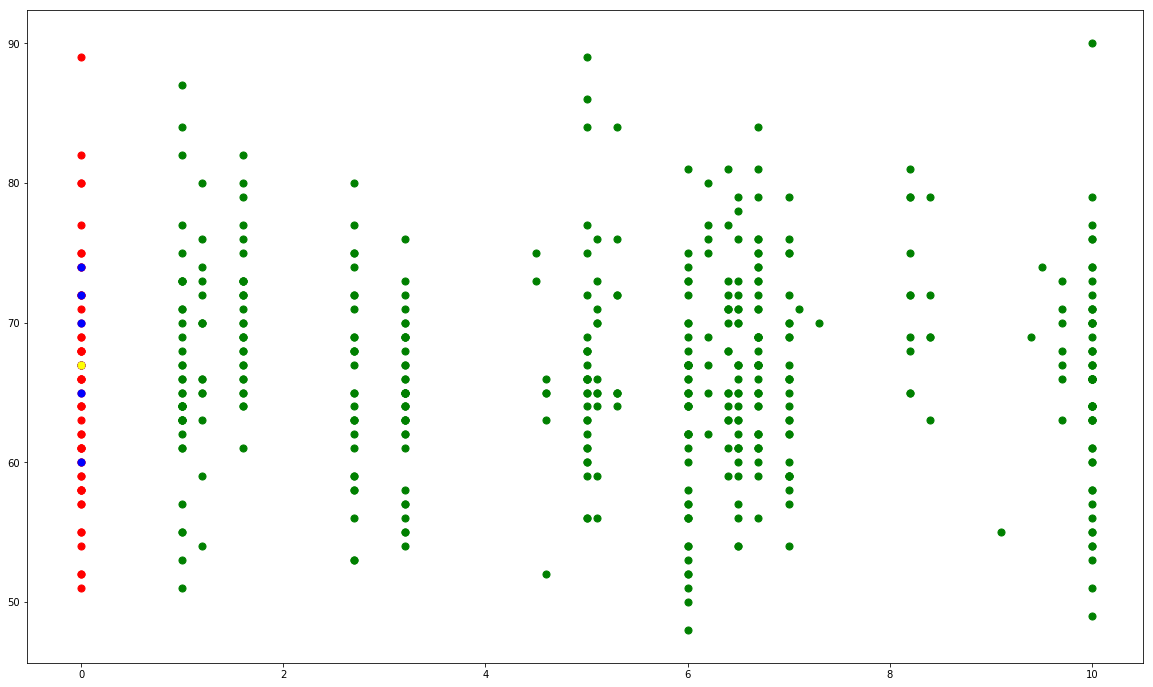

In [133]:
fig = plt.figure(figsize=(20,12))
df['Labels'] = est_dbscan.labels_
df_pca['Labels'] = est_dbscan.labels_
colors = ['Red', 'Green', 'Blue', 'Yellow', 'Pink', 'Black', 'Purple', 'Orange', 'Grey']
for j in range(-1, max(est_dbscan.labels_)):
    if j == -1:
        noise = df.sample(500)[df['Labels'] == -1]
        plt.scatter(noise['Position'], noise['Overall'], marker='x')
    else:
        cluster = df.sample(500)[df['Labels'] == j]
        plt.scatter(cluster['Position'], cluster['Overall'], color=colors[j], s=50)

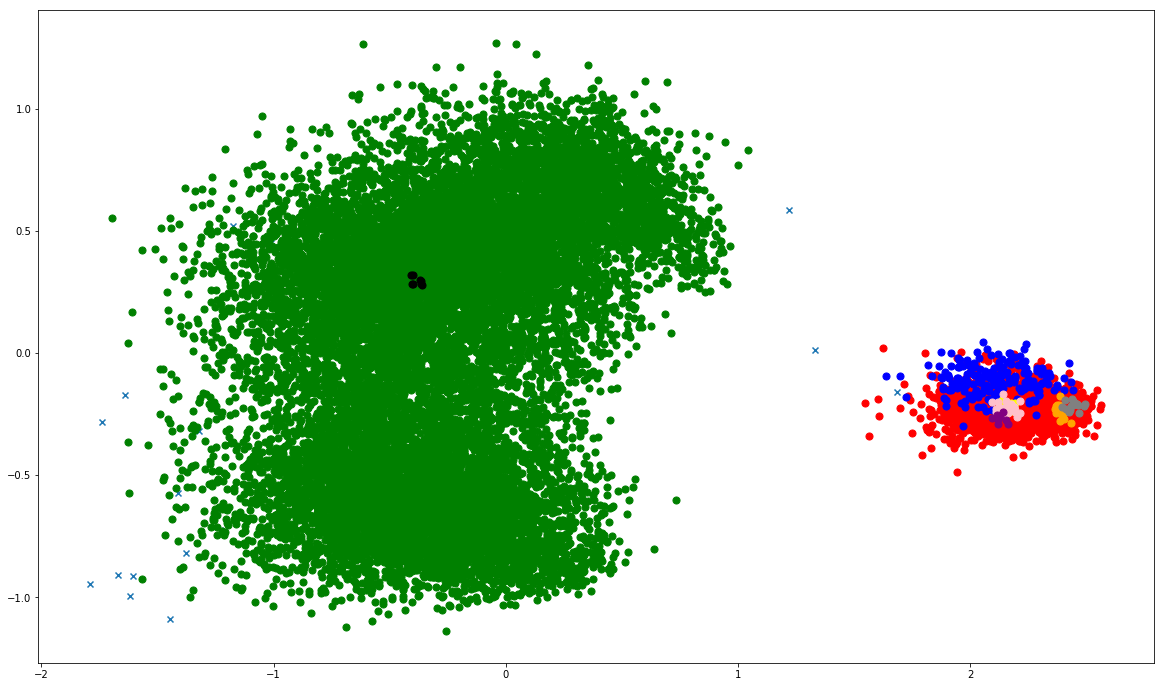

In [134]:
fig = plt.figure(figsize=(20,12))
for j in range(-1, max(est_dbscan.labels_)):
    if j == -1:
        noise = df_pca[df_pca['Labels'] == -1]
        plt.scatter(noise['pca1'], noise['pca2'], marker='x')
    else:
        cluster = df_pca[df_pca['Labels'] == j]
        plt.scatter(cluster['pca1'], cluster['pca2'], color=colors[j], s=50)